<a href="https://www.kaggle.com/code/prabhutaditya/credit-card-fraud-detection?scriptVersionId=141355943" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
test="/kaggle/input/fraud-detection/fraudTest.csv"
train="/kaggle/input/fraud-detection/fraudTrain.csv"

In [3]:
train_data=pd.read_csv(train)
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_data=pd.read_csv(test)
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
train_data=train_data.drop_duplicates()

In [6]:
#finding correlations
train_corr=train_data.corr()
train_corr

/tmp/ipykernel_20/2673589016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr=train_data.corr()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/tmp/ipykernel_20/3028557868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)


<Axes: >

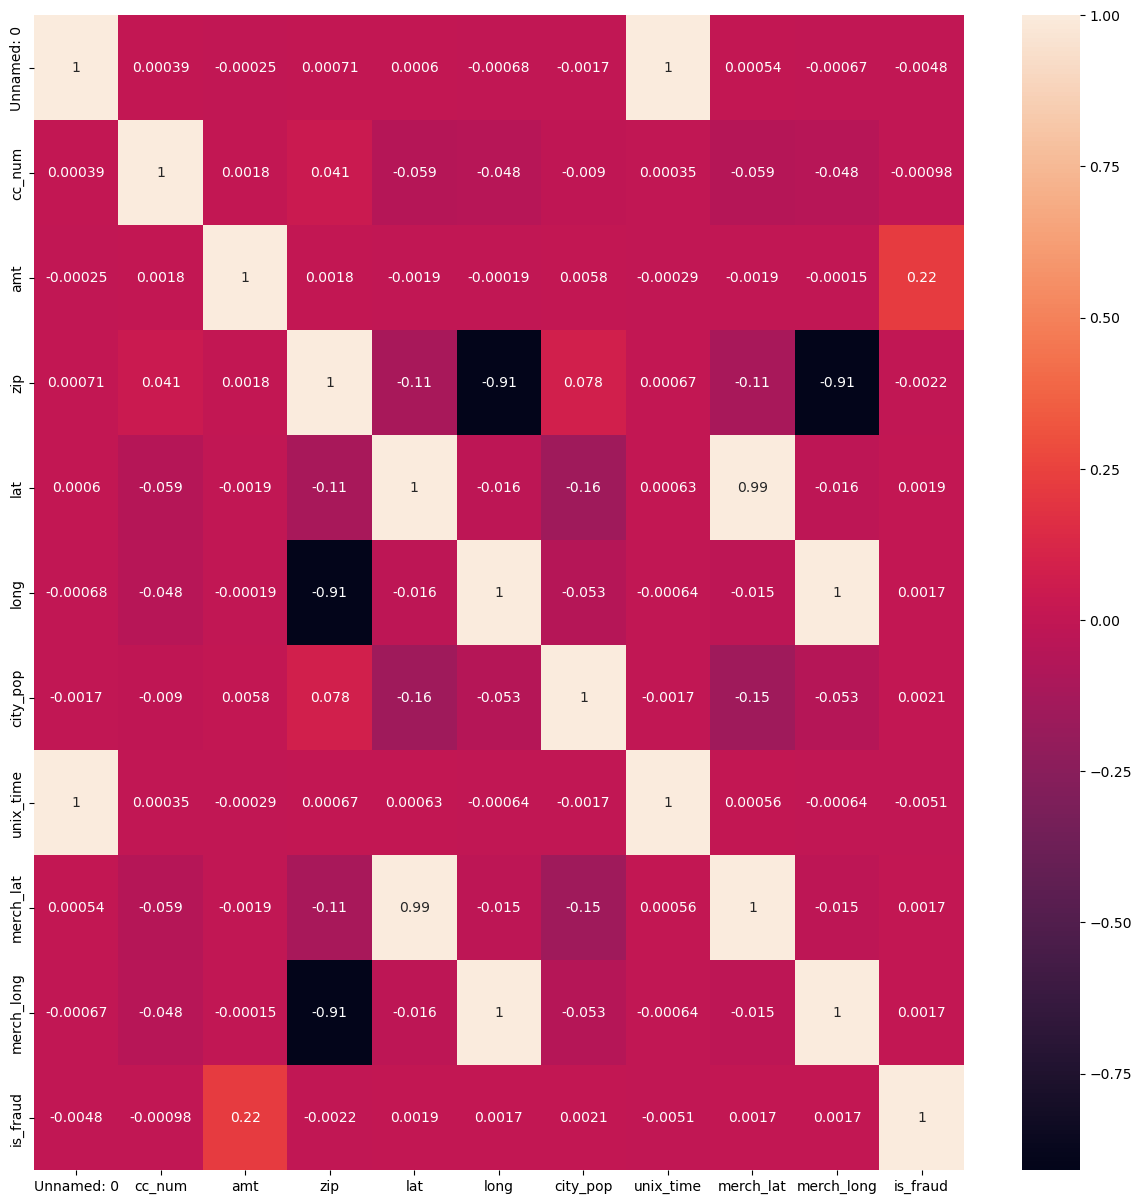

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)

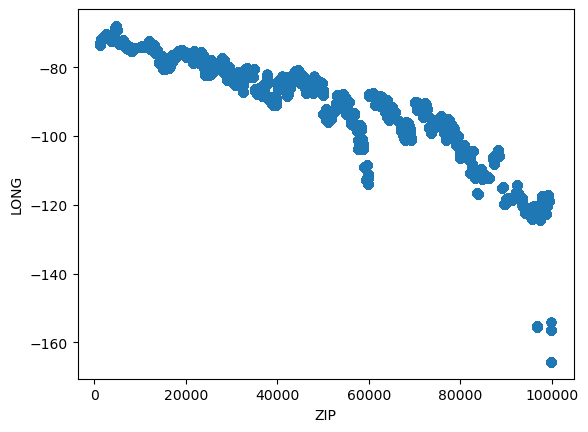

In [9]:
plt.scatter(train_data["zip"],train_data["long"])
plt.xlabel("ZIP")
plt.ylabel("LONG")
plt.show()

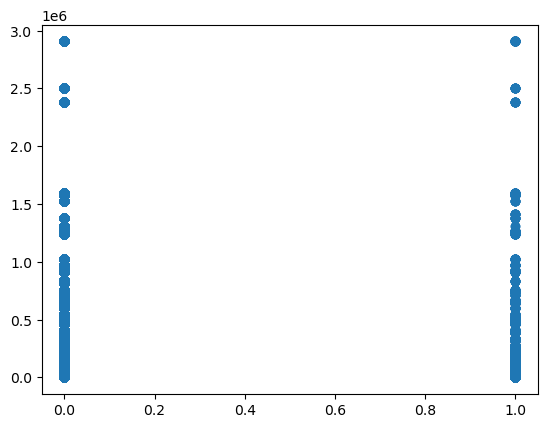

In [10]:
plt.scatter(train_data["is_fraud"],train_data["city_pop"])

In [11]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
train_data=train_data.drop(['Unnamed: 0','trans_date_trans_time','cc_num', 'category', 'first', 'last', 'gender', 'street', 'city', 'state',
     'city_pop', 'dob', 'trans_num',
       'merch_lat', 'merch_long','merchant'] ,axis=1)

In [13]:
train_data

,amt,zip,lat,long,job,unix_time,is_fraud
0,4.97,28654,36.0788,-81.1781,"Psychologist, counselling",1325376018,0
1,107.23,99160,48.8878,-118.2105,Special educational needs teacher,1325376044,0
2,220.11,83252,42.1808,-112.2620,Nature conservation officer,1325376051,0
3,45.00,59632,46.2306,-112.1138,Patent attorney,1325376076,0
4,41.96,24433,38.4207,-79.4629,Dance movement psychotherapist,1325376186,0
...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,Geoscientist,1371816728,0
1296671,51.70,21790,39.2667,-77.5101,"Production assistant, television",1371816739,0
1296672,105.93,88325,32.9396,-105.8189,Naval architect,1371816752,0
1296673,74.90,57756,43.3526,-102.5411,Volunteer coordinator,1371816816,0


In [14]:
train_data.job.value_counts()
train_data.job=pd.Categorical(train_data.job).codes
train_data

,amt,zip,lat,long,job,unix_time,is_fraud
0,4.97,28654,36.0788,-81.1781,370,1325376018,0
1,107.23,99160,48.8878,-118.2105,428,1325376044,0
2,220.11,83252,42.1808,-112.2620,307,1325376051,0
3,45.00,59632,46.2306,-112.1138,328,1325376076,0
4,41.96,24433,38.4207,-79.4629,116,1325376186,0
...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,215,1371816728,0
1296671,51.70,21790,39.2667,-77.5101,360,1371816739,0
1296672,105.93,88325,32.9396,-105.8189,308,1371816752,0
1296673,74.90,57756,43.3526,-102.5411,485,1371816816,0


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=train_data[["amt","zip","lat","long","job","unix_time"]]

In [16]:
vif_data = pd.DataFrame() #converting the data into df
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature         VIF
0        amt    0.999994
1        zip    6.383175
2        lat    1.105380
3       long    6.281872
4        job    1.001384
5  unix_time  166.122253


In [17]:
#By looking at the VIF now we can conclude to eliminate unix_time due to its high VIF (means low R^2 score)

In [18]:
train_data=train_data.drop("unix_time", axis=1)
train_data

,amt,zip,lat,long,job,is_fraud
0,4.97,28654,36.0788,-81.1781,370,0
1,107.23,99160,48.8878,-118.2105,428,0
2,220.11,83252,42.1808,-112.2620,307,0
3,45.00,59632,46.2306,-112.1138,328,0
4,41.96,24433,38.4207,-79.4629,116,0
...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,215,0
1296671,51.70,21790,39.2667,-77.5101,360,0
1296672,105.93,88325,32.9396,-105.8189,308,0
1296673,74.90,57756,43.3526,-102.5411,485,0


In [19]:
Y=train_data.loc[:,"is_fraud"]
X=train_data.drop("is_fraud",axis=1)
Y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [20]:
X

,amt,zip,lat,long,job
0,4.97,28654,36.0788,-81.1781,370
1,107.23,99160,48.8878,-118.2105,428
2,220.11,83252,42.1808,-112.2620,307
3,45.00,59632,46.2306,-112.1138,328
4,41.96,24433,38.4207,-79.4629,116
...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,215
1296671,51.70,21790,39.2667,-77.5101,360
1296672,105.93,88325,32.9396,-105.8189,308
1296673,74.90,57756,43.3526,-102.5411,485


In [21]:
test_data.job=pd.Categorical(test_data.job).codes
X_test=test_data[["amt","zip","lat","long","job"]]
X_test

,amt,zip,lat,long,job
0,2.86,29209,33.9659,-80.9355,275
1,29.84,84002,40.3207,-110.4360,392
2,41.28,11710,40.6729,-73.5365,259
3,60.05,32780,28.5697,-80.8191,407
4,3.19,49632,44.2529,-85.0170,196
...,...,...,...,...,...
555714,43.77,63453,40.4931,-91.8912,460
555715,111.84,77566,29.0393,-95.4401,198
555716,86.88,99323,46.1966,-118.9017,294
555717,7.99,83643,44.6255,-116.4493,58


In [22]:
Y_test=test_data.loc[:,"is_fraud"]
Y_test

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [23]:
from sklearn.metrics import classification_report

In [24]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X,Y)  

LogisticRegression(random_state=0)

In [25]:
Y_Pred=classifier.predict(X_test)
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

